# Laboratorio 1 - Preparación y Visualización de Datos

## Grupo 1 - Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 2 - Netflix

### 2.1- Confirma o desmiente la hipótesis de que las series han desbancado a las películas en la oferta de Netflix.

In [255]:
%config IPCompleter.greedy=True

#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Deberiamos analizar el numero de películas vs el numero de serie....
#Importamos el CSV de Netflix
df_netflix = pd.read_csv('netflix.csv')
#Visualizamos los datos
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [256]:
#Preprocesamiento de datos
#Miramos si hay peliculas o series faltantes (Sin Titulo)
titulos = df_netflix['title']
print('Hay',titulos.isnull().sum(),'datos sin título')

#Miramos si hay peliculas repetidas
titulosDuplicados = df_netflix.duplicated().sum()
print('Hay',titulosDuplicados,'titulos duplicados')

Hay 0 datos sin título
Hay 0 titulos duplicados


In [257]:
#Tamaño del dataset
print('El Dataset tiene',df_netflix.shape[0],'instancias y',df_netflix.shape[1],'atributos');

#Sacamos los diferentes tipos
tipos = df_netflix["type"]
print('Los valores para clasiicar en el dataset disponibles son:',set(tipos))

#Numero de peliculas
peliculas = tipos[tipos=="Movie"].count()
#Numeros de series
series = tipos[tipos=="TV Show"].count()

#Resultados
print('En el Dataset hay',peliculas,'peliculas y',series,'series')
print('Para comprobar si hay algo diferente de pelicula o serie, sumamos el numero de ambas')

#Suma de peliculas y series. Deberá ser igual al número total de instancias del dataset
pelisYSeries = peliculas+series

#Comprobamos que solo haya peliculas y series
if pelisYSeries == tipos.shape[0]:
    print('Hay solo datos de películas y series, no hay ninguna etiqueta más para tipificar')
else:
    print('Hay otro tipo de etiqueta diferente a TV Show o Movie')


El Dataset tiene 6234 instancias y 12 atributos
Los valores para clasiicar en el dataset disponibles son: {'TV Show', 'Movie'}
En el Dataset hay 4265 peliculas y 1969 series
Para comprobar si hay algo diferente de pelicula o serie, sumamos el numero de ambas
Hay solo datos de películas y series, no hay ninguna etiqueta más para tipificar


### 2.1.1- (1 punto) Encuentra el número de películas vs número de series disponibles totales ¿Qué porcentaje del contenido representa cada categoría? Muéstralo en un gráfico justificando la elección del tipo de gráfico.

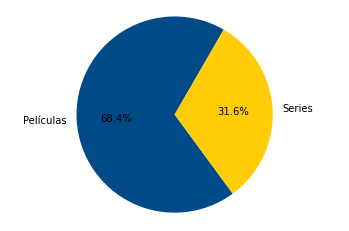

In [258]:
#Hemos encontrado que hay 4265 peliculas y 1969 series
#PieChart
labels = 'Películas','Series'
sizes = [peliculas,series]
colors = ['#004B87', '#FFCD07']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=60, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 2.1.2- (1 punto) Estudia el número de películas vs número de series disponibles por año de publicación en Netflix. Para eso, crea un gráfico que muestre la evolución temporal (por años) de la cantidad de series y de películas disponibles en la plataforma. Justifica el gráfico elegido y explica la tendencia que observas en los datos. ¿Qué conclusión puedes extraer?

In [284]:
#Dataframe con - Tipo / Titulo / Año de Publicacion
df_Netflix2 = df_netflix[['type','title','release_year','date_added']]

#Realmente no necesitamos el título, si bien, nos ayuda a entender los datos mejor
#Borramos los datos donde no haya valores, ya que si no sabemos cuando se publicó esa película no podemos analizarla
df_Netflix2 = df_Netflix2.dropna()

fechaRelease = df_netflix[['date_added']].dropna()

years = fechaRelease['date_added'].apply(str).str[-4:]

df_Netflix2['date_added'] = years

years = np.sort(years.unique())

In [285]:
pelisTotales = 0
seriesTotales = 0
numAnios = 0;

arrayPelis = []
arraySeries = []

for year in years:
    pelisPorAnio = df_Netflix2[(df_Netflix2['type'] == 'Movie') & (df_Netflix2['date_added'] == year)]
    seriesPorAnio = df_Netflix2[(df_Netflix2['type'] == 'TV Show') & (df_Netflix2['date_added'] == year)]
    print('En el año\033[1m',year,'\033[0mNetflix lanzó\033[1m',pelisPorAnio.shape[0],'películas\033[0m y\033[1m',seriesPorAnio.shape[0],'series\033[0m')
    pelisTotales += pelisPorAnio.shape[0]
    seriesTotales += seriesPorAnio.shape[0]
    arrayPelis.append(pelisPorAnio.shape[0])
    arraySeries.append(seriesPorAnio.shape[0])
    numAnios += 1

En el año 2008 Netflix lanzó 1 películas y 1 series
En el año 2009 Netflix lanzó 2 películas y 0 series
En el año 2010 Netflix lanzó 1 películas y 0 series
En el año 2011 Netflix lanzó 13 películas y 0 series
En el año 2012 Netflix lanzó 4 películas y 3 series
En el año 2013 Netflix lanzó 6 películas y 6 series
En el año 2014 Netflix lanzó 19 películas y 6 series
En el año 2015 Netflix lanzó 58 películas y 32 series
En el año 2016 Netflix lanzó 264 películas y 192 series
En el año 2017 Netflix lanzó 913 películas y 387 series
En el año 2018 Netflix lanzó 1290 películas y 492 series
En el año 2019 Netflix lanzó 1546 películas y 803 series
En el año 2020 Netflix lanzó 147 películas y 37 series


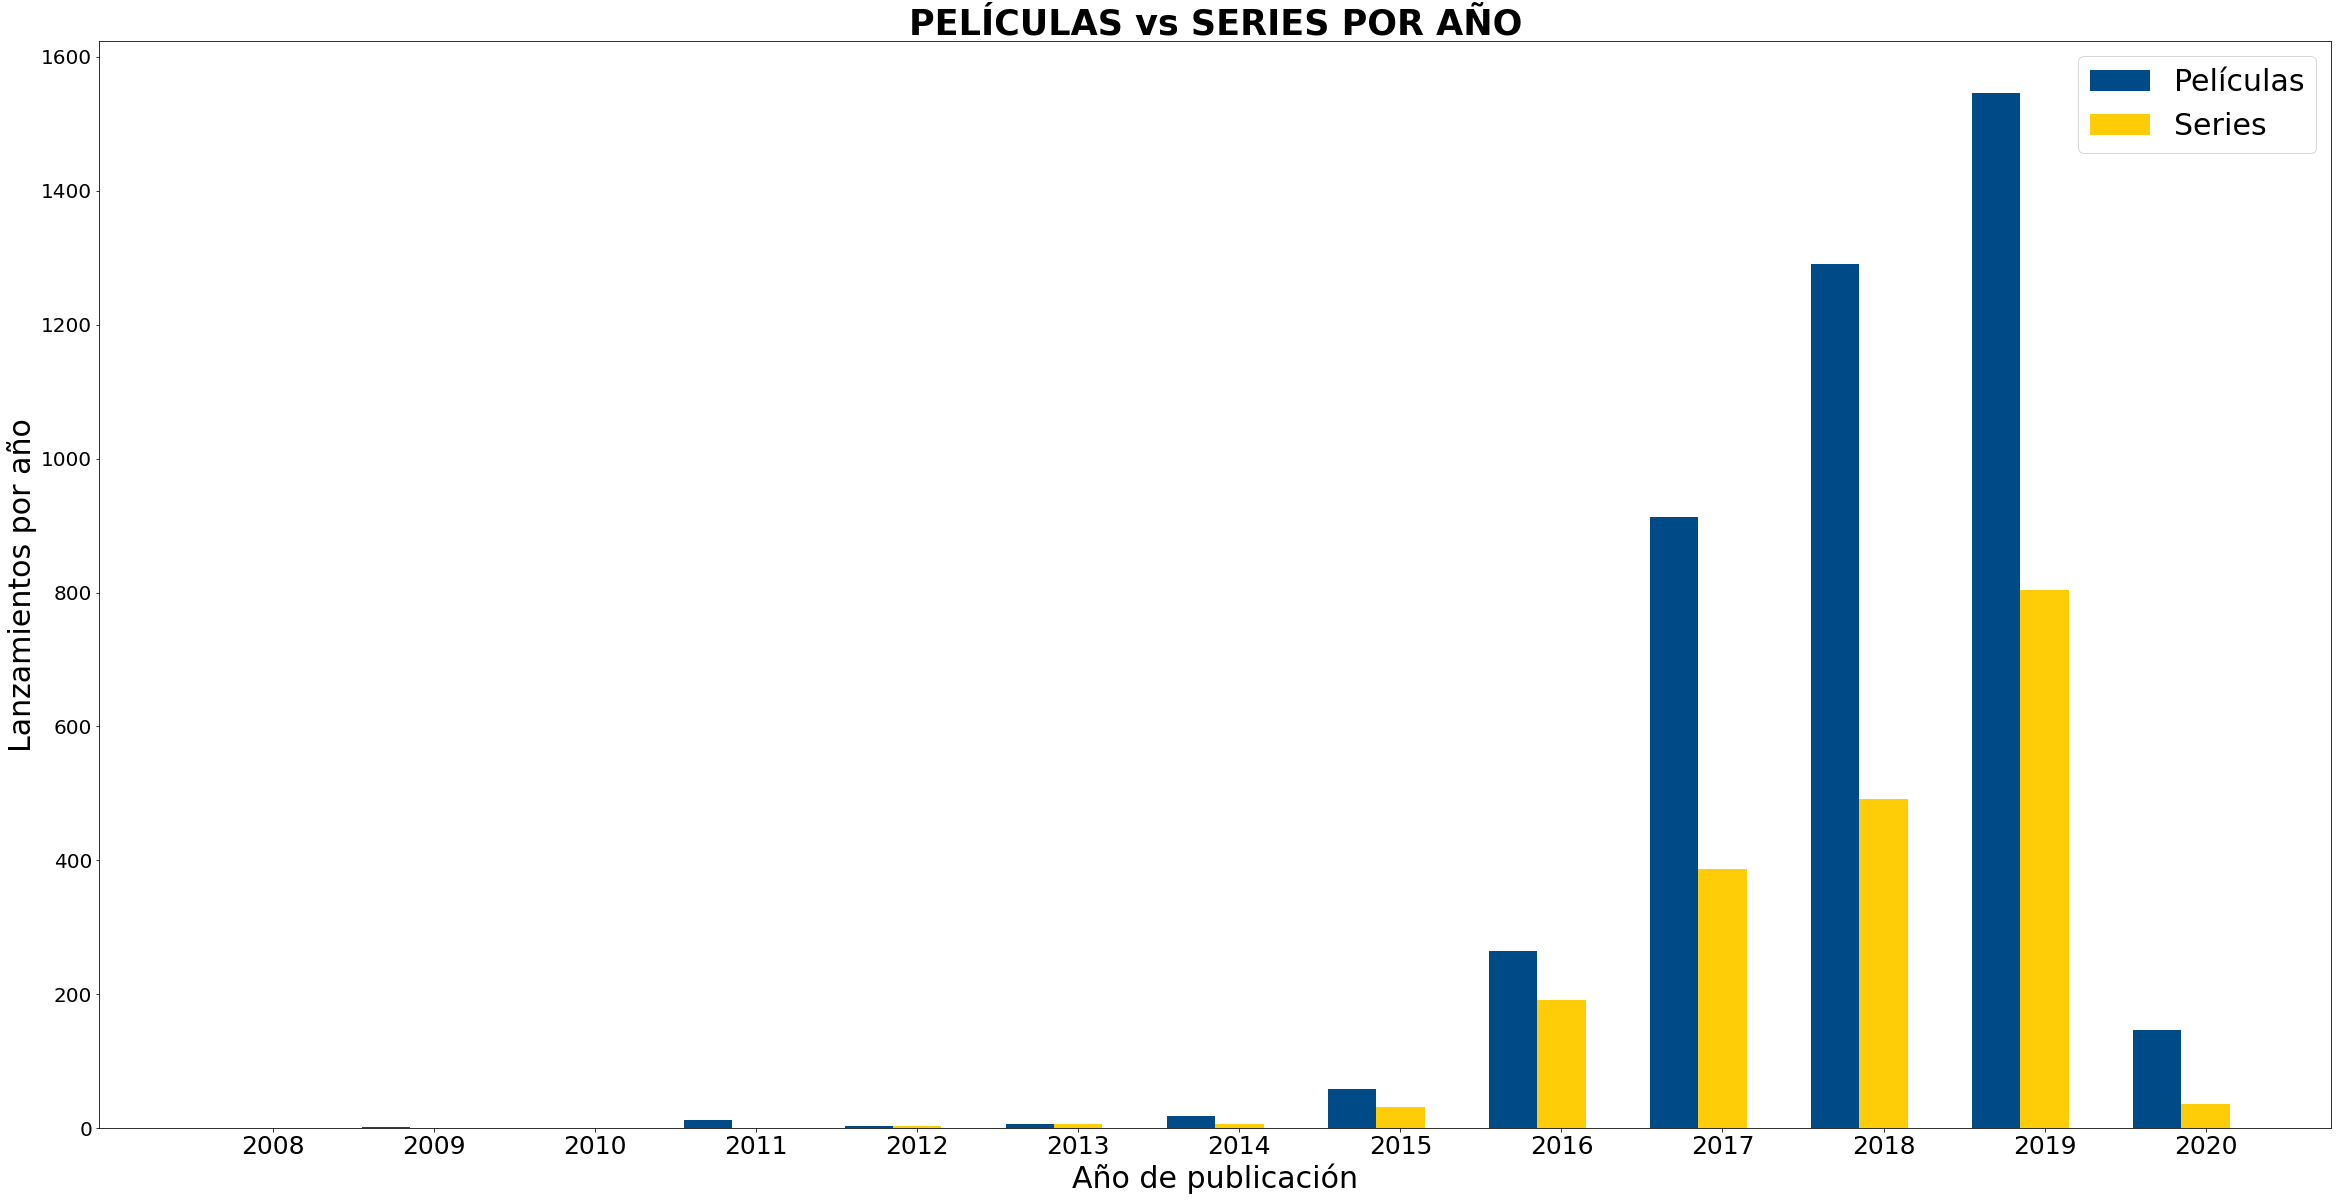

In [289]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = arrayPelis
 
# Choose the height of the cyan bars
bars2 = arraySeries
 
# Choose the height of the error bars (bars1)
yer1 = years
 
# Choose the height of the error bars (bars2)
yer2 = years
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(40, 20))
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = '#004B87', label='Películas')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = '#FFCD07', label='Series')
 
# general layout
plt.title('PELÍCULAS vs SERIES POR AÑO', fontsize=35, fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], years, fontsize=25)
plt.xlabel('Año de publicación',fontsize=30)
plt.yticks(fontsize=20)
plt.ylabel('Lanzamientos por año',fontsize=30)
plt.legend(fontsize=30)

plt.savefig('PelisVSSeries.png')

# Show graphic
plt.show()

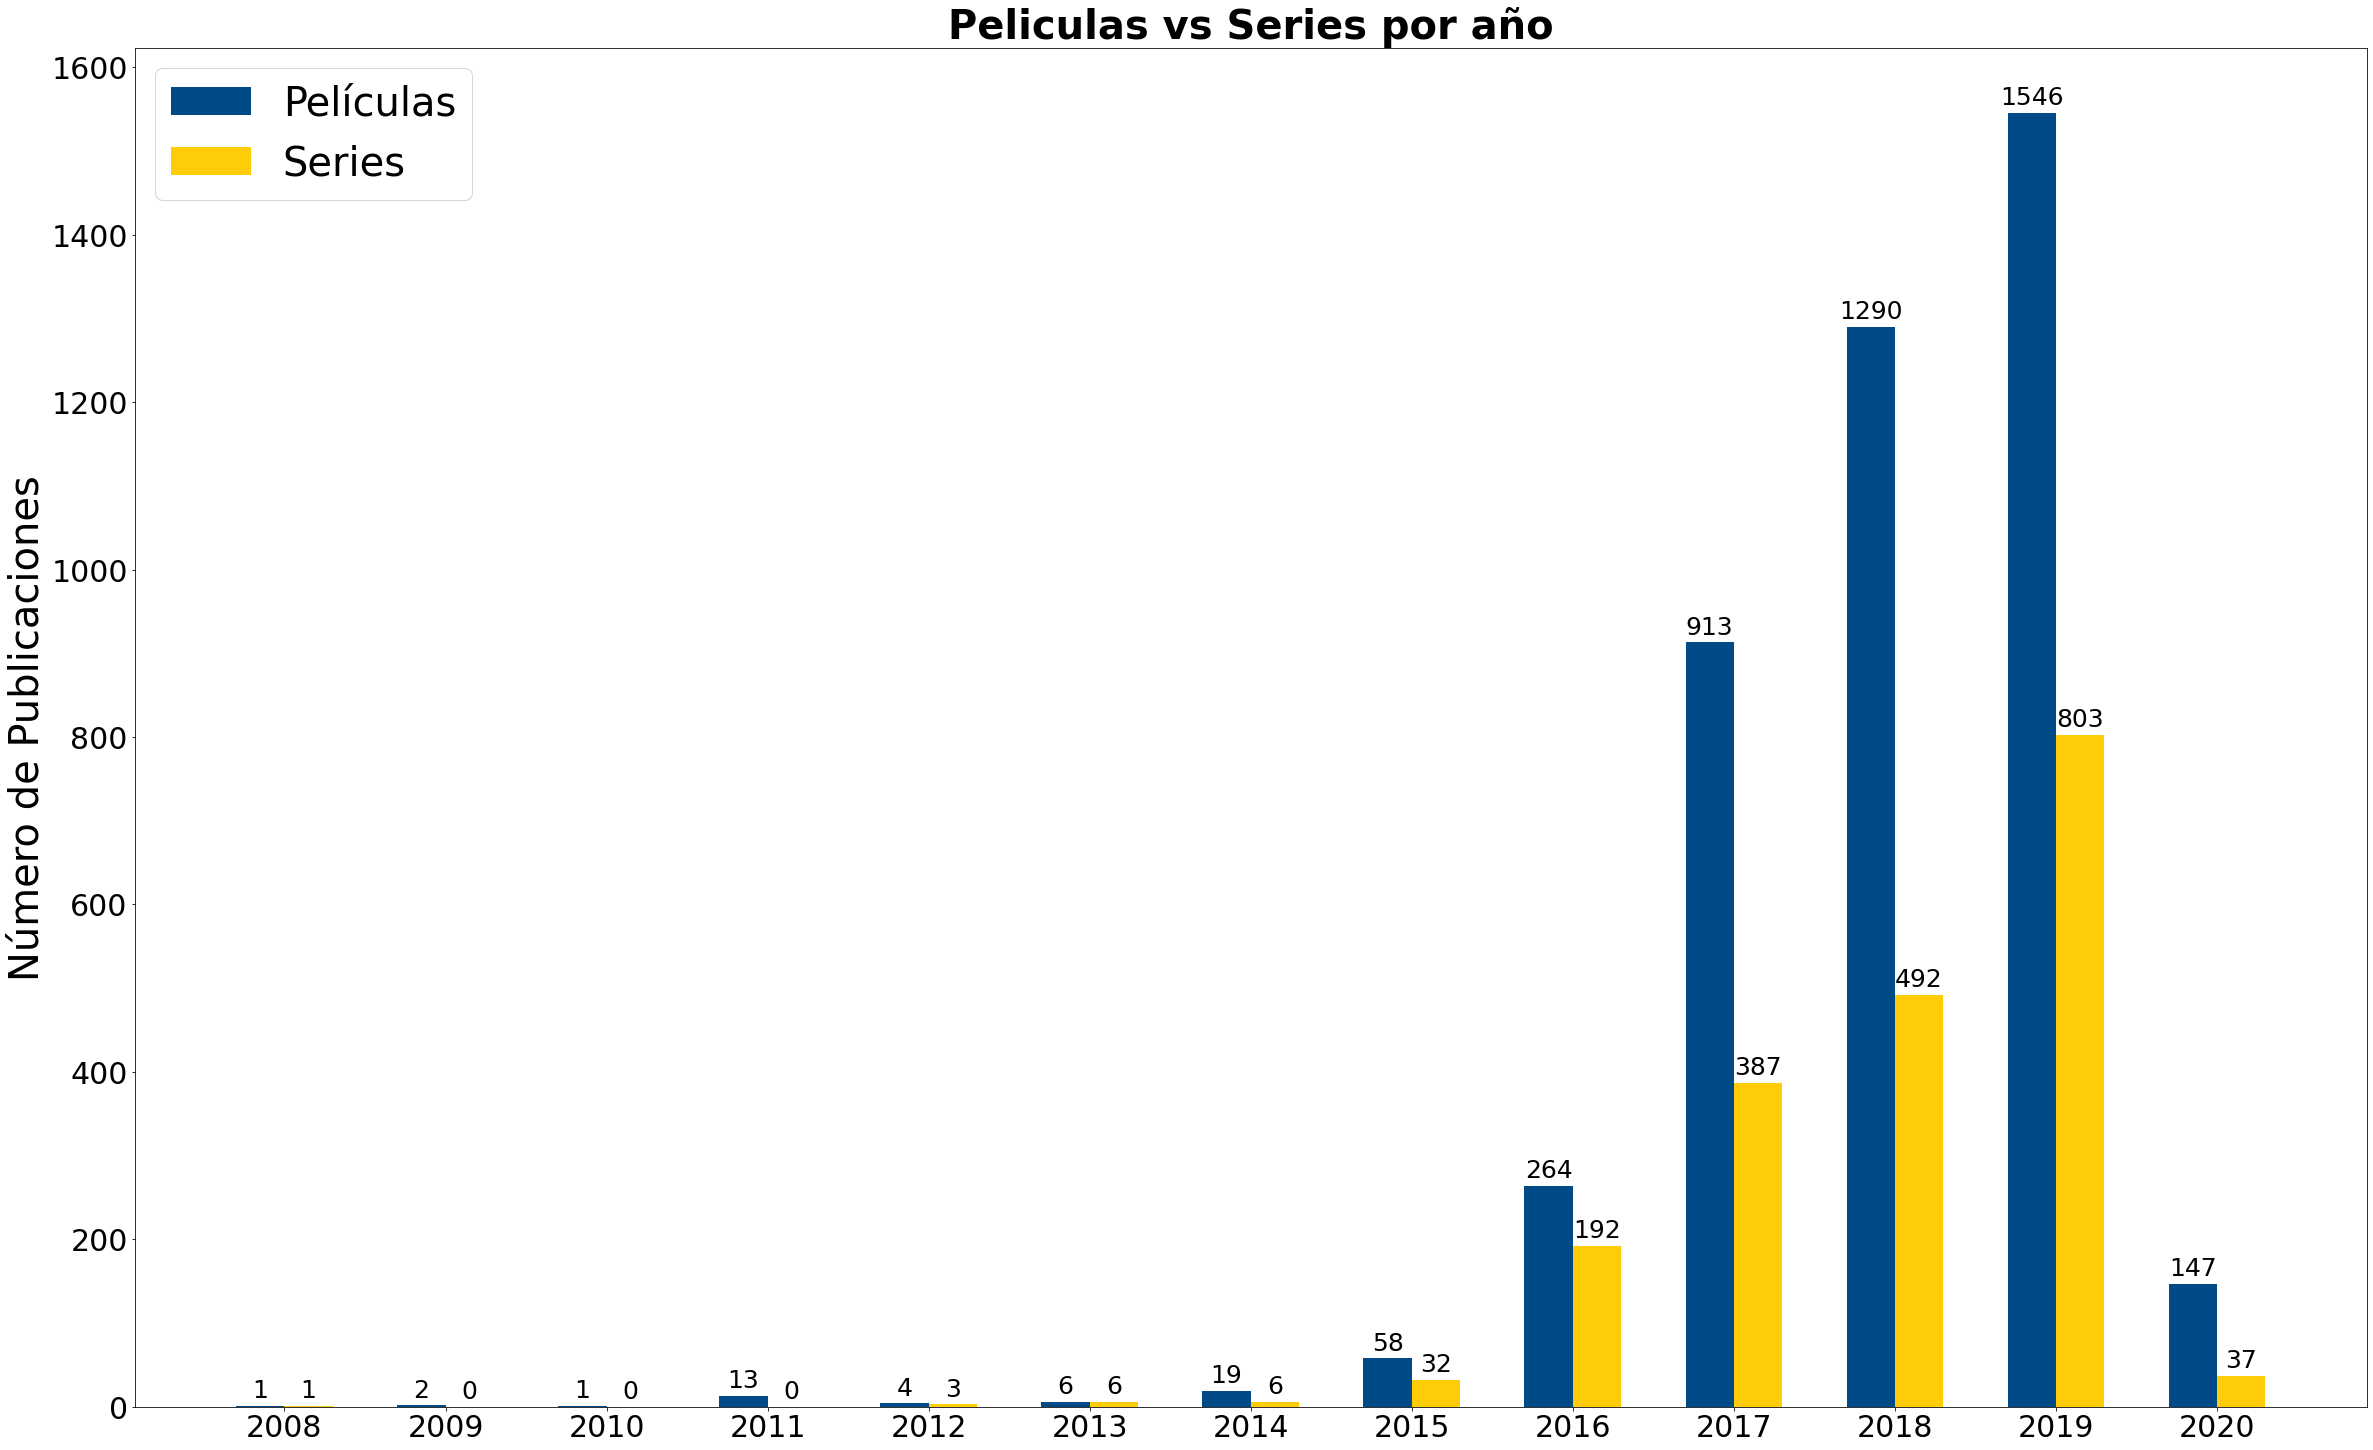

In [310]:
labels = years
pelis = arrayPelis
series = arraySeries

x = np.arange(len(labels))  # the label locations
width = .3  # the width of the bars

fig, ax = plt.subplots(figsize=(40,25))
rects1 = ax.bar(x - width/2, pelis, width, color = '#004B87', label='Películas')
rects2 = ax.bar(x + width/2, series, width, color = '#FFCD07', label='Series')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Número de Publicaciones',fontsize=40)
ax.set_title('Peliculas vs Series por año',fontsize=40, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=25)

autolabel(rects1)
autolabel(rects2)

plt.legend(fontsize=40)
plt.yticks(fontsize=30)

plt.show()

### 2.2- (0.5 puntos) Estudia la viabilidad de la plataforma Netflix ¿se sigue añadiendo contenido o hay una tendencia a la baja? Es decir, ¿la plataforma sigue creciendo o se pueden apreciar signos de desaceleración?

#### Para esto muestra la cantidad de contenido añadido a la plataforma por años. Justifica el gráfico elegido y explica la tendencia observada.

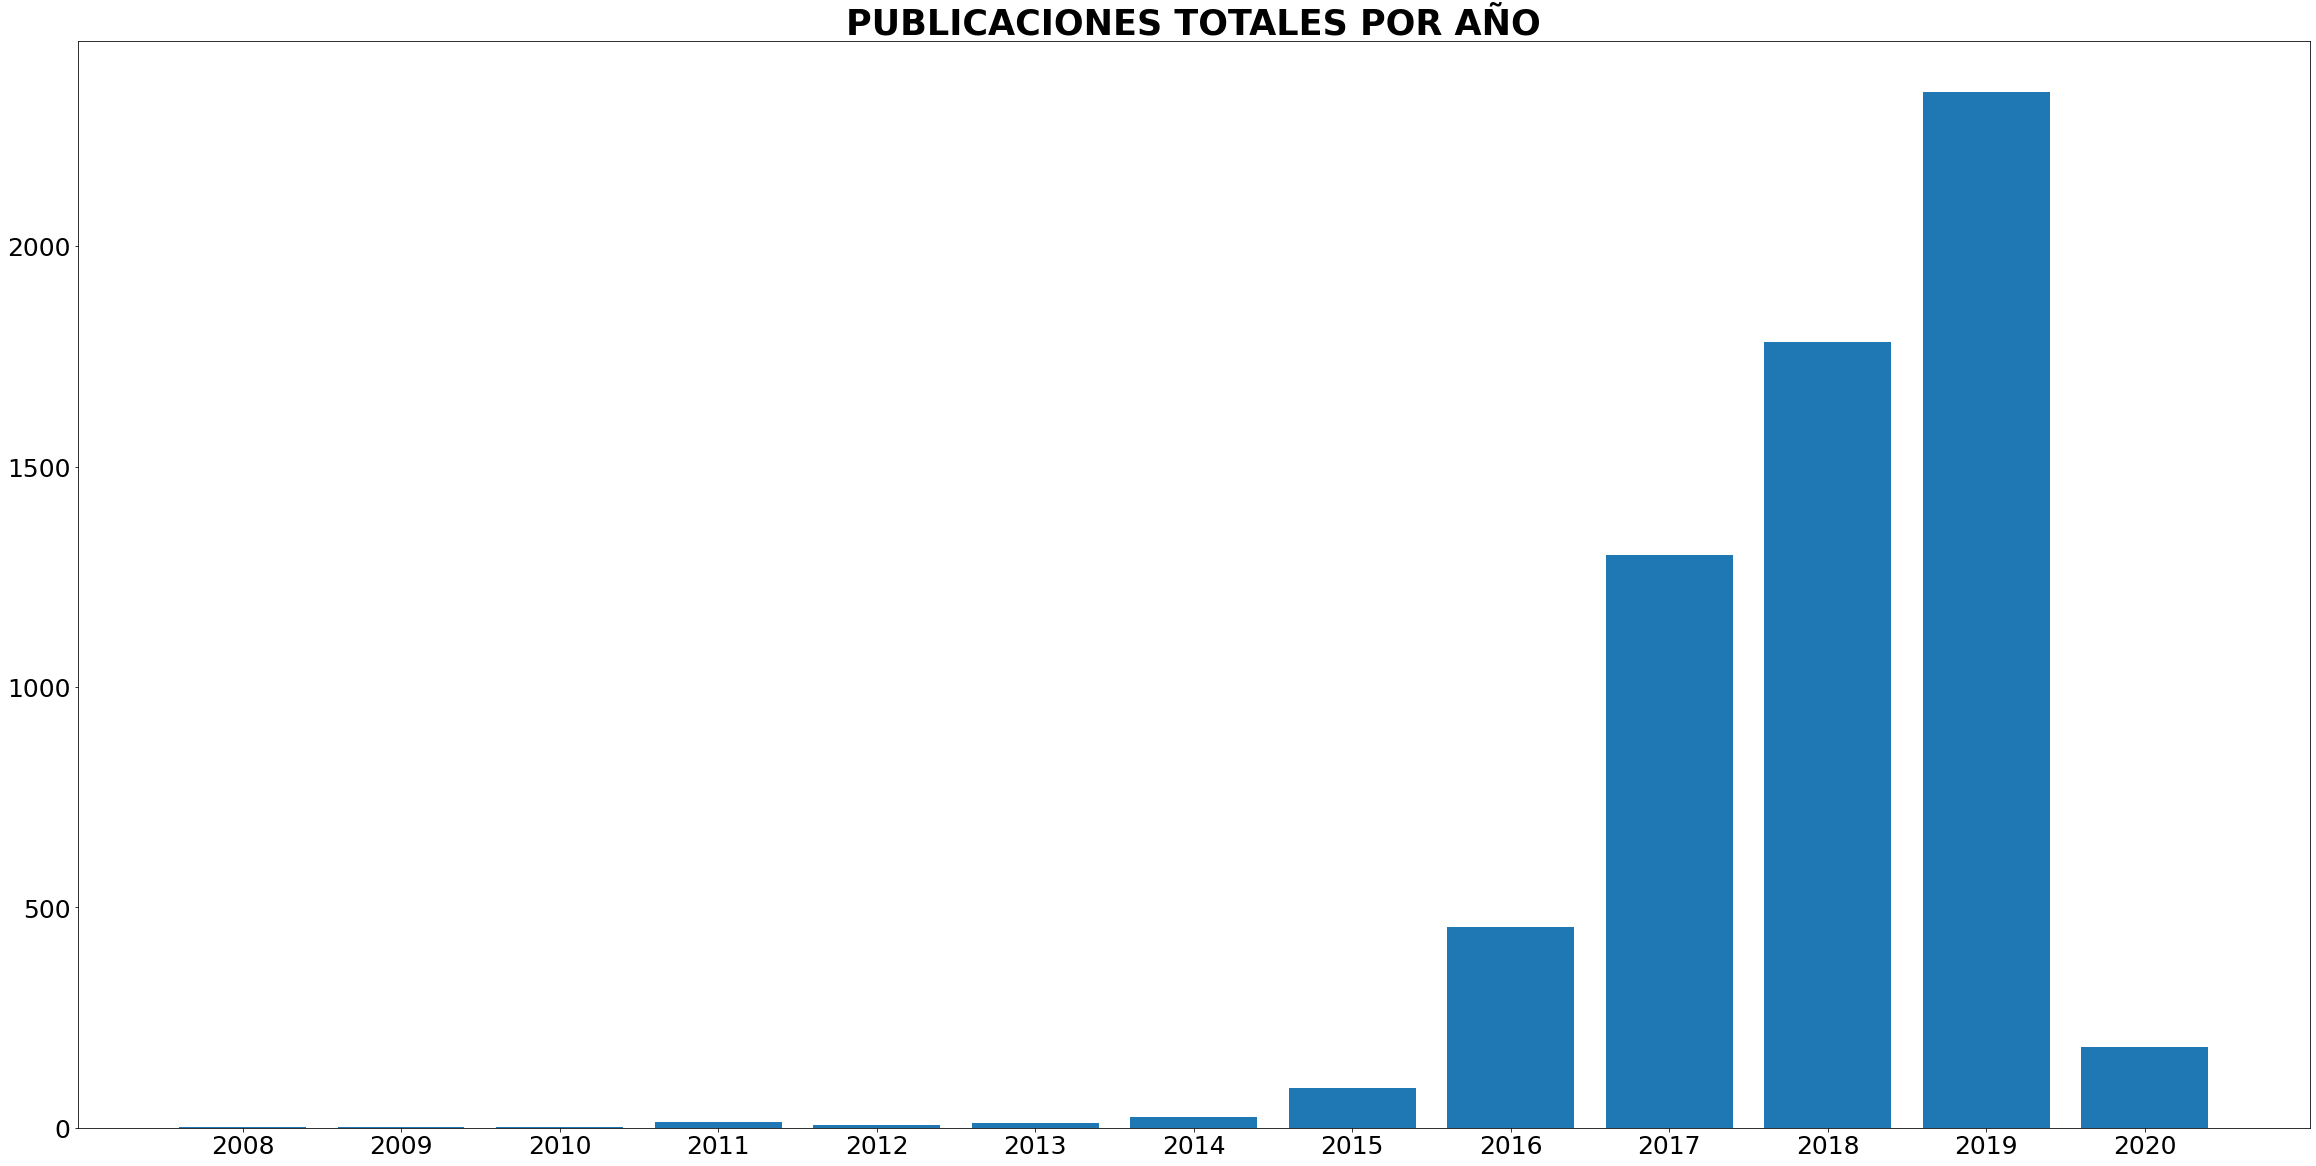

In [296]:
#Debemos mirar si sumando peliculas y series por años, se han ido añadiendo más o menos contenidos
arrayTotal = []

#Para cada uno de los años
for year in years:
    pelisPorAnio = df_Netflix2[(df_Netflix2['type'] == 'Movie') & (df_Netflix2['date_added'] == year)]
    seriesPorAnio = df_Netflix2[(df_Netflix2['type'] == 'TV Show') & (df_Netflix2['date_added'] == year)]
    arrayTotal.append(pelisPorAnio.shape[0] + seriesPorAnio.shape[0])
    numAnios += 1

height = arrayTotal
bars = years
posiciones = np.arange(len(bars))
iteraciones = 0

plt.figure(figsize=(40, 20))

# Create bars
plt.bar(posiciones, height)
 
# Create names on the x-axis
plt.xticks(posiciones, bars, fontsize=25)
plt.yticks(fontsize=25)

plt.title('PUBLICACIONES TOTALES POR AÑO', fontsize=35, fontweight='bold')

 
# Show graphic
plt.show()

In [ ]:
## TO DO JUSTIFICACION

### 2.3-Estudio del momento de aparición del contenido en Netflix. 

### 2.3.1-(1 punto) ¿Cuál es el retraso medio en publicar una película en Netflix? ¿Y para una serie? ¿hay variación en este retraso a lo largo de los años? Visualiza los datos utilizando los gráficos más adecuados justificando su elección.¿Crees que este reflejo de la actividad de la plataforma es un indicativo de su viabilidad y proyección? Justifica la respuesta preferiblemente apoyándote en los datos. 

### 2.3.2-(1 punto) ¿Hay un momento preferido en el año para publicar un contenido? Es decir, ¿hay algún momento del año en el que se ponga más contenido disponible? Para averiguar esto, estudia la media de contenido publicado para cada mes durante el tiempo de vida de Netflix. ¿Hay diferencias si se trata de una película o de una serie? Utiliza de manera justificada los gráficos correspondientes para respaldar tus respuestas. 